In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("1 - 20 Percent Training Set.csv")

In [3]:
df.drop(df.columns[9:22],axis=1,inplace=True)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,100,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25188,0,tcp,ftp_data,SF,334,0,0,0,0,1,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient
25189,0,tcp,private,REJ,0,0,0,0,0,105,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25190,0,tcp,nnsp,S0,0,0,0,0,0,129,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
target                         0
dtype: int64

In [6]:
df_else = df.sample(frac=0.9, random_state=25)
df_test = df.drop(df_else.index)

In [7]:
df_else

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
13027,0,tcp,http,SF,224,1551,0,0,0,15,...,255,1.00,0.00,0.02,0.02,0.0,0.0,0.0,0.0,normal
12698,0,tcp,pop_3,SF,35,130,0,0,0,1,...,5,0.04,0.09,0.02,0.40,0.0,0.0,0.0,0.0,normal
2586,0,tcp,auth,REJ,0,0,0,0,0,231,...,7,0.03,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune
10204,0,tcp,time,S0,0,0,0,0,0,191,...,8,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune
15362,0,tcp,private,REJ,0,0,0,0,0,85,...,20,0.08,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18053,0,icmp,ecr_i,SF,1032,0,0,0,0,132,...,132,0.52,0.01,0.52,0.00,0.0,0.0,0.0,0.0,smurf
7120,0,tcp,netbios_dgm,S0,0,0,0,0,0,160,...,7,0.03,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune
12293,0,tcp,Z39_50,S0,0,0,0,0,0,262,...,9,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune
421,0,tcp,uucp,RSTO,0,0,0,0,0,116,...,3,0.01,0.08,0.00,0.00,0.0,0.0,1.0,1.0,neptune


In [8]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
14,0,tcp,name,S0,0,0,0,0,0,233,...,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune
32,0,tcp,http,SF,303,555,0,0,0,9,...,255,1.00,0.00,0.11,0.01,0.00,0.0,0.00,0.0,normal
62,0,tcp,private,REJ,0,0,0,0,0,175,...,1,0.00,0.84,0.00,0.00,0.07,0.0,0.62,1.0,satan
71,0,tcp,private,S0,0,0,0,0,0,145,...,31,0.12,0.05,0.00,0.00,1.00,1.0,0.00,0.0,neptune
89,315,udp,other,SF,146,105,0,0,0,3,...,2,0.02,0.54,0.78,0.00,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25145,0,icmp,urp_i,SF,183,0,0,0,0,2,...,19,0.07,0.01,0.09,0.00,0.00,0.0,0.00,0.0,normal
25151,0,tcp,ssh,S0,0,0,0,0,0,228,...,13,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune
25153,0,tcp,http,SF,253,2365,0,0,0,8,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
25178,0,tcp,private,S0,0,0,0,0,0,18,...,17,0.07,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune


In [9]:
print(df_else.shape)
print(df_test.shape)

(22673, 29)
(2519, 29)


In [10]:
df_train = df_else.sample(frac=0.8, random_state = 20)
df_val = df_else.drop(df_train.index)

In [11]:
print(df_train.shape)
print(df_val.shape)

(18138, 29)
(4535, 29)


In [12]:


newtargetdf=df_train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newtargetdf_val=df_val.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newtargetdf_test=df_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

df_train= newtargetdf
df_val= newtargetdf_val
df_test=newtargetdf_test

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [14]:
df_val.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,auth,REJ,0,0,0,0,0,231,...,7,0.03,0.07,0.00,0.00,0.0,0.0,1.0,1.0,1
1,0,tcp,private,REJ,0,0,0,0,0,85,...,20,0.08,0.07,0.00,0.00,0.0,0.0,1.0,1.0,1
2,0,tcp,http,SF,343,751,0,0,0,12,...,112,1.00,0.00,0.08,0.13,0.0,0.0,0.0,0.0,0
3,0,tcp,telnet,S0,0,0,0,0,0,242,...,21,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,1
4,0,udp,domain_u,SF,44,44,0,0,0,15,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0


In [15]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,84.591180,27.698754,0.286338,0.283762,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,114.673451,72.468242,0.447312,0.447599,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,14.000000,8.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,144.000000,18.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,511.000000,511.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_train=pd.get_dummies(df_train)
df_val=pd.get_dummies(df_val)
df_test=pd.get_dummies(df_test)

In [17]:
df_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,261,14,1.00,1.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,204,10,0.64,1.0,...,0,0,0,0,1,0,0,0,0,0
2,0,192,36186,0,0,0,1,1,0.00,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,334,0,0,0,0,2,2,0.00,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,265,8,0.00,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,0,0,0,0,0,0,276,3,1.00,1.0,...,0,0,0,0,1,0,0,0,0,0
18134,0,0,0,0,0,0,382,1,0.09,0.0,...,1,0,0,0,0,0,0,0,0,0
18135,0,0,0,0,0,0,187,6,1.00,1.0,...,0,0,0,0,1,0,0,0,0,0
18136,0,1032,0,0,0,0,305,305,0.00,0.0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,233,1,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,0,303,555,0,0,0,9,9,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,175,1,0.1,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,145,16,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,315,146,105,0,0,0,3,2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0,183,0,0,0,0,2,1,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2515,0,0,0,0,0,0,228,13,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2516,0,253,2365,0,0,0,8,8,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2517,0,0,0,0,0,0,18,17,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)


print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (18138, 100)
Testing Features shape:  (2519, 100)


In [20]:
#feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_train.drop(['target'],axis=1)
y = df_train[['target']]

fs = f_classif(X,y)

c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [21]:
fs

(array([2.51620264e+02, 2.70281804e+00, 1.25683423e+02, 7.35476477e-02,
        6.82813915e+01,            nan, 3.12932906e+03, 3.72275923e+01,
        7.09696637e+03, 7.11682274e+03, 6.57473772e+02, 6.68055226e+02,
        9.61485786e+03, 5.73903913e+02, 5.70988476e+02, 1.32875132e+03,
        4.87128365e+03, 4.87763499e+03, 1.87717860e+03, 1.99456352e+03,
        1.24327350e+03, 7.23380536e+03, 7.40233500e+03, 5.79174162e+02,
        6.79608391e+02, 7.58737827e+02, 4.24072147e+02, 2.86445368e+02,
        6.56447681e+00, 2.25775834e+00, 5.59589249e+01, 2.90239616e+01,
        3.95315933e+01, 4.79245418e+01, 3.12571172e+01, 3.68918029e+01,
        2.98778676e+01, 2.56220978e+01, 2.27293040e+01, 3.36626357e+02,
        1.72721133e+01, 1.87341310e+03, 1.69220411e+02, 3.08211827e+01,
        2.36423931e+01, 2.33340622e+01, 2.02282867e+02, 3.06412100e+02,
        2.46973062e+01, 2.82097260e+01, 2.09937560e+03, 3.31379292e+01,
        4.23712040e+01, 3.95742067e+01, 2.68213085e+01, 1.913582

In [22]:
fs_df = pd.DataFrame(columns=['f_score','p_value'])

col = []
f_score = []
p_value = []
for i in range(len(df_train.columns)-1):
    col.append(df_train.columns[i])
    f_score.append(fs[0][i])
    p_value.append(fs[1][i])
    
fs_df['col'] = col
fs_df['f_score'] = f_score
fs_df['p_value'] = p_value

In [23]:
fs_df

,f_score,p_value,col
0,251.620264,9.432618e-211,duration
1,2.702818,2.880086e-02,src_bytes
2,125.683423,5.115478e-106,dst_bytes
3,0.073548,9.901852e-01,land
4,68.281391,1.844251e-57,wrong_fragment
...,...,...,...
94,13.342497,7.394185e-11,flag_S0
95,3.604966,6.082007e-03,flag_S1
96,2.402247,4.759497e-02,flag_S2
97,8079.930149,0.000000e+00,flag_S3


In [24]:
fs_df = fs_df.sort_values(by=['f_score'], ascending=False)
fs_df = fs_df.reset_index(drop=True)
fs_df

,f_score,p_value,col
0,9614.857860,0.000000,same_srv_rate
1,8079.930149,0.000000,flag_S3
2,7649.198460,0.000000,flag_RSTR
3,7402.335001,0.000000,dst_host_srv_serror_rate
4,7233.805361,0.000000,dst_host_serror_rate
...,...,...,...
94,2.257758,0.060372,service_IRC
95,2.218356,0.064387,service_rje
96,0.904378,0.460261,service_pop_2
97,0.073548,0.990185,land


In [25]:
fs_df.loc[fs_df['p_value'] <= 0.05]

,f_score,p_value,col
0,9614.857860,0.000000,same_srv_rate
1,8079.930149,0.000000,flag_S3
2,7649.198460,0.000000,flag_RSTR
3,7402.335001,0.000000,dst_host_srv_serror_rate
4,7233.805361,0.000000,dst_host_serror_rate
...,...,...,...
89,4.083842,0.002608,service_private
90,3.864414,0.003850,service_pm_dump
91,3.604966,0.006082,flag_S1
92,2.702818,0.028801,src_bytes


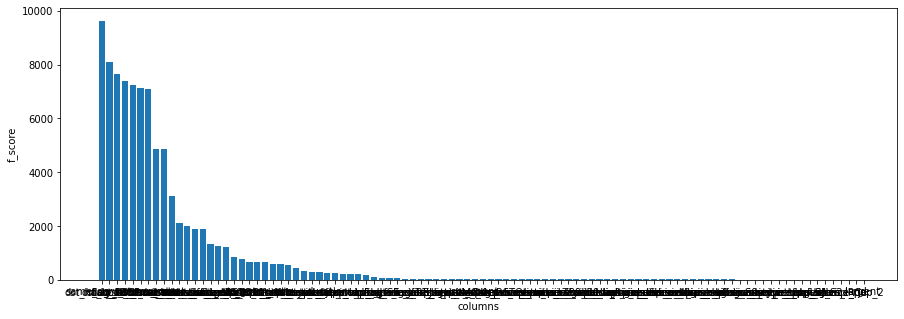

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(fs_df['col'],fs_df['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

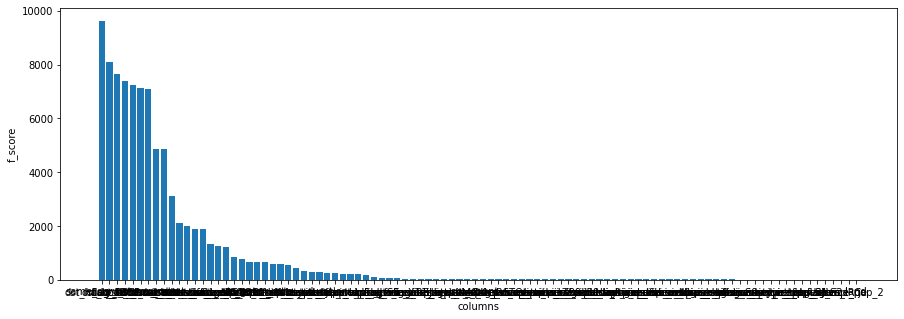

In [27]:
plt.figure(figsize=(15,5))
plt.bar(fs_df.loc[fs_df['f_score'] <10000]['col'], fs_df.loc[fs_df['f_score'] < 10000]['f_score'])
plt.xlabel('columns')
plt.ylabel('f_score')
plt.show()

In [28]:
fs_sel = []
for i in range(len(fs_df.loc[fs_df['f_score'] > 2000])):
    fs_sel.append(fs_df['col'][i])

fs_sel

['same_srv_rate',
 'flag_S3',
 'flag_RSTR',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'count',
 'service_hostnames']

In [29]:
fs_sel.append('target')

In [30]:
df_train = df_train[fs_sel]
df_test = df_test[fs_sel]
df_val = df_val[fs_sel]

In [31]:
df_test

,same_srv_rate,flag_S3,flag_RSTR,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,serror_rate,dst_host_same_srv_rate,dst_host_srv_count,count,service_hostnames,target
0,0.00,0,0,1.0,1.00,1.0,1.0,0.00,1,233,0,1
1,1.00,0,0,0.0,0.00,0.0,0.0,1.00,255,9,0,0
2,0.01,0,0,0.0,0.07,0.0,0.1,0.00,1,175,0,2
3,0.11,0,0,1.0,1.00,1.0,1.0,0.12,31,145,0,1
4,0.67,0,0,0.0,0.00,0.0,0.0,0.02,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.50,0,0,0.0,0.00,0.0,0.0,0.07,19,2,0,0
2515,0.06,0,0,1.0,1.00,1.0,1.0,0.05,13,228,0,1
2516,1.00,0,0,0.0,0.00,0.0,0.0,1.00,255,8,0,0
2517,0.94,0,0,1.0,1.00,1.0,1.0,0.07,17,18,0,1


In [32]:
df_train

,same_srv_rate,flag_S3,flag_RSTR,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,serror_rate,dst_host_same_srv_rate,dst_host_srv_count,count,service_hostnames,target
0,0.05,0,0,1.0,1.00,1.0,1.00,0.03,7,261,0,1
1,0.05,0,0,1.0,1.00,1.0,0.64,0.04,11,204,0,1
2,1.00,0,0,0.0,0.00,0.0,0.00,1.00,255,1,0,0
3,1.00,0,0,0.0,0.00,0.0,0.00,1.00,14,2,0,3
4,0.03,0,0,0.0,0.00,0.0,0.00,0.03,8,265,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18133,0.01,0,0,1.0,1.00,1.0,1.00,0.01,3,276,0,1
18134,0.00,0,0,0.0,0.11,0.0,0.09,0.00,1,382,0,2
18135,0.03,0,0,1.0,1.00,1.0,1.00,0.06,15,187,0,1
18136,1.00,0,0,0.0,0.01,0.0,0.00,0.36,53,305,0,1


In [33]:
X_train = df_train.drop(columns = ['target'],axis=1)
y_train=df_train['target']

In [34]:
X_test = df_test.drop(columns = ['target'],axis=1)
y_test=df_test['target']

In [35]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
import tensorflow as tf
import keras


In [36]:
X_train

,same_srv_rate,flag_S3,flag_RSTR,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,serror_rate,dst_host_same_srv_rate,dst_host_srv_count,count,service_hostnames
0,0.05,0,0,1.0,1.00,1.0,1.00,0.03,7,261,0
1,0.05,0,0,1.0,1.00,1.0,0.64,0.04,11,204,0
2,1.00,0,0,0.0,0.00,0.0,0.00,1.00,255,1,0
3,1.00,0,0,0.0,0.00,0.0,0.00,1.00,14,2,0
4,0.03,0,0,0.0,0.00,0.0,0.00,0.03,8,265,0
...,...,...,...,...,...,...,...,...,...,...,...
18133,0.01,0,0,1.0,1.00,1.0,1.00,0.01,3,276,0
18134,0.00,0,0,0.0,0.11,0.0,0.09,0.00,1,382,0
18135,0.03,0,0,1.0,1.00,1.0,1.00,0.06,15,187,0
18136,1.00,0,0,0.0,0.01,0.0,0.00,0.36,53,305,0


In [37]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train = DataFrame(scaler.transform(X_train))
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,0.05,0.0,0.0,1.0,1.00,1.0,1.00,0.03,0.027451,0.509804,0.0
1,0.05,0.0,0.0,1.0,1.00,1.0,0.64,0.04,0.043137,0.398039,0.0
2,1.00,0.0,0.0,0.0,0.00,0.0,0.00,1.00,1.000000,0.000000,0.0
3,1.00,0.0,0.0,0.0,0.00,0.0,0.00,1.00,0.054902,0.001961,0.0
4,0.03,0.0,0.0,0.0,0.00,0.0,0.00,0.03,0.031373,0.517647,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18133,0.01,0.0,0.0,1.0,1.00,1.0,1.00,0.01,0.011765,0.539216,0.0
18134,0.00,0.0,0.0,0.0,0.11,0.0,0.09,0.00,0.003922,0.747059,0.0
18135,0.03,0.0,0.0,1.0,1.00,1.0,1.00,0.06,0.058824,0.364706,0.0
18136,1.00,0.0,0.0,0.0,0.01,0.0,0.00,0.36,0.207843,0.596078,0.0


In [38]:
scaler1= MinMaxScaler()
scaler1 = scaler.fit(X_test)

X_test = DataFrame(scaler1.transform(X_test))
X_test

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.0,0.0,1.0,1.00,1.0,1.0,0.00,0.000000,0.454902,0.0
1,1.00,0.0,0.0,0.0,0.00,0.0,0.0,1.00,1.000000,0.015686,0.0
2,0.01,0.0,0.0,0.0,0.07,0.0,0.1,0.00,0.000000,0.341176,0.0
3,0.11,0.0,0.0,1.0,1.00,1.0,1.0,0.12,0.118110,0.282353,0.0
4,0.67,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.003937,0.003922,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2514,0.50,0.0,0.0,0.0,0.00,0.0,0.0,0.07,0.070866,0.001961,0.0
2515,0.06,0.0,0.0,1.0,1.00,1.0,1.0,0.05,0.047244,0.445098,0.0
2516,1.00,0.0,0.0,0.0,0.00,0.0,0.0,1.00,1.000000,0.013725,0.0
2517,0.94,0.0,0.0,1.0,1.00,1.0,1.0,0.07,0.062992,0.033333,0.0


In [39]:
y_train_nn=pd.get_dummies(y_train)

In [40]:
y_train_nn

,0,1,2,3,4
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
18133,0,1,0,0,0
18134,0,0,1,0,0
18135,0,1,0,0,0
18136,0,1,0,0,0


In [41]:
y_test_nn=pd.get_dummies(y_test)

In [42]:
y_test_nn

,0,1,2,3
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
2514,1,0,0,0
2515,0,1,0,0
2516,1,0,0,0
2517,0,1,0,0


In [43]:
y_train_nn=[]
for i in y_train:
    temp=[0]*5
    temp[i]=1
    y_train_nn.append(temp[:])  
y_train_nn=DataFrame(y_train_nn)

In [44]:
y_test_nn=[]
for i in y_test:
    temp=[0]*5
    temp[i]=1
    y_test_nn.append(temp[:])  
y_test_nn=DataFrame(y_test_nn)

In [45]:
y_train_nn

,0,1,2,3,4
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
18133,0,1,0,0,0
18134,0,0,1,0,0
18135,0,1,0,0,0
18136,0,1,0,0,0


In [46]:
input_shape=(11,)
input_tensor = tf.keras.Input(shape=input_shape)

x=Dense(64,activation='relu')(input_tensor)
x=Dense(32,activation='relu')(x)
x=Dense(16,activation='relu')(x)
x = Dense(5, name='before_softmax')(x)
x = Activation('softmax', name='predictions')(x)
Fmodel = Model(input_tensor, x)

      
Fmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Fmodel.fit(X_train, y_train_nn, validation_data=(X_test, y_test_nn), batch_size=16, epochs=25)
score = Fmodel.evaluate(X_test, y_test_nn, verbose=0)
print('\n')
print('Overall Test score:', score[0])
print('Overall Test accuracy:',score[1])

Epoch 1/25
1134/1134 [==============================] - 2s 1ms/step - loss: 0.4685 - accuracy: 0.8645 - val_loss: 0.3047 - val_accuracy: 0.8896
Epoch 2/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.9018 - val_loss: 0.2663 - val_accuracy: 0.8964
Epoch 3/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.9088 - val_loss: 0.2471 - val_accuracy: 0.9079
Epoch 4/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.9153 - val_loss: 0.2425 - val_accuracy: 0.9047
Epoch 5/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2365 - accuracy: 0.9159 - val_loss: 0.2312 - val_accuracy: 0.9246
Epoch 6/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9183 - val_loss: 0.2189 - val_accuracy: 0.9238
Epoch 7/25
1134/1134 [==============================] - 1s 1ms/step - loss: 0.2241 - accuracy: 0.9204 - val_loss: 0.2239 - val_accuracy:

In [47]:
Fmodel

In [48]:
Fmodel.save('FinalModel.h5')

In [49]:
model_regen = keras.models.load_model('FinalModel.h5')